### **1. Import libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

### **2. Load Dataset**

In [2]:
file_path = '/content/drive/MyDrive/Insurance Project/synthetic_insurance_data.csv'
df = pd.read_csv(file_path)

### **3. EDA (Exploratory Data Analysis)**

In [4]:
print("Data shape:", df.shape)

Data shape: (10000, 27)


In [5]:
print("\nData types:\n", df.dtypes)


Data types:
 Age                                    int64
Is_Senior                              int64
Marital_Status                        object
Married_Premium_Discount               int64
Prior_Insurance                       object
Prior_Insurance_Premium_Adjustment     int64
Claims_Frequency                       int64
Claims_Severity                       object
Claims_Adjustment                      int64
Policy_Type                           object
Policy_Adjustment                      int64
Premium_Amount                         int64
Safe_Driver_Discount                   int64
Multi_Policy_Discount                  int64
Bundling_Discount                      int64
Total_Discounts                        int64
Source_of_Lead                        object
Time_Since_First_Contact               int64
Conversion_Status                      int64
Website_Visits                         int64
Inquiries                              int64
Quotes_Requested                       in

In [6]:
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 Age                                   0
Is_Senior                             0
Marital_Status                        0
Married_Premium_Discount              0
Prior_Insurance                       0
Prior_Insurance_Premium_Adjustment    0
Claims_Frequency                      0
Claims_Severity                       0
Claims_Adjustment                     0
Policy_Type                           0
Policy_Adjustment                     0
Premium_Amount                        0
Safe_Driver_Discount                  0
Multi_Policy_Discount                 0
Bundling_Discount                     0
Total_Discounts                       0
Source_of_Lead                        0
Time_Since_First_Contact              0
Conversion_Status                     0
Website_Visits                        0
Inquiries                             0
Quotes_Requested                      0
Time_to_Conversion                    0
Credit_Score                          0
Premium_Adjustment_Cre

In [7]:
print("\nClaim Severity distribution:\n", df['Claims_Severity'].value_counts())


Claim Severity distribution:
 Claims_Severity
Low       7003
Medium    2038
High       959
Name: count, dtype: int64


### **4. Visualization**

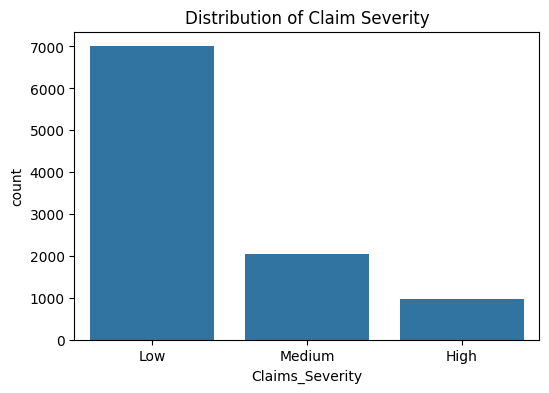

In [8]:
plt.figure(figsize=(6,4))
sns.countplot(x='Claims_Severity', data=df, order=['Low', 'Medium', 'High'])
plt.title("Distribution of Claim Severity")
plt.show()

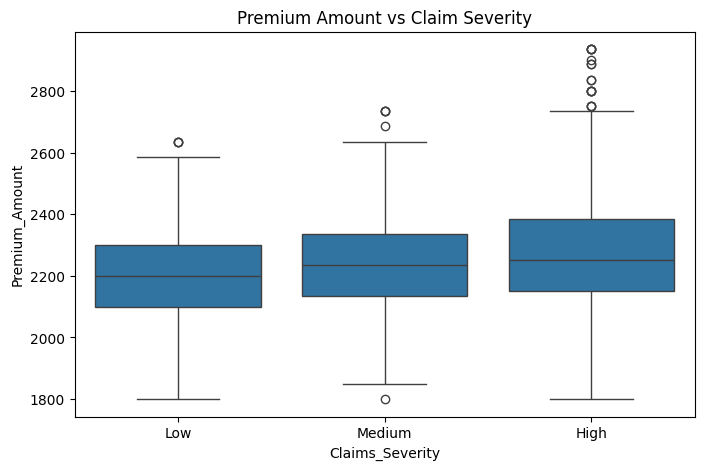

In [9]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Claims_Severity', y='Premium_Amount', data=df)
plt.title("Premium Amount vs Claim Severity")
plt.show()

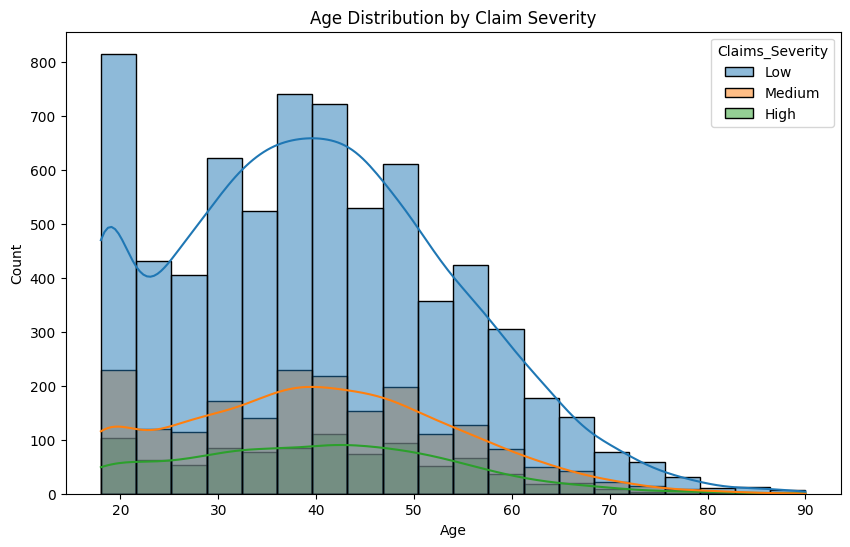

In [10]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Age', hue='Claims_Severity', bins=20, kde=True)
plt.title("Age Distribution by Claim Severity")
plt.show()

### **5. Featured Engineering**

In [12]:
df_model = df.copy()

# Encode categorical variables
cat_cols = ['Marital_Status', 'Prior_Insurance', 'Claims_Severity', 'Policy_Type',
            'Source_of_Lead', 'Region']
le = LabelEncoder()
for col in cat_cols:
    df_model[col] = le.fit_transform(df_model[col])


### **6. Define Features and Target**

In [13]:
X = df_model.drop(columns=['Claims_Severity'])
y = df_model['Claims_Severity']

### **7. Train-Test Split**

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **8. Modeling**

In [15]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

### **9. Evaluation**

In [16]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Low', 'Medium', 'High']))


Confusion Matrix:
[[  77  128    0]
 [   0 1346    7]
 [   2  271  169]]

Classification Report:
              precision    recall  f1-score   support

         Low       0.97      0.38      0.54       205
      Medium       0.77      0.99      0.87      1353
        High       0.96      0.38      0.55       442

    accuracy                           0.80      2000
   macro avg       0.90      0.58      0.65      2000
weighted avg       0.83      0.80      0.76      2000



### **10. Feature Importance**

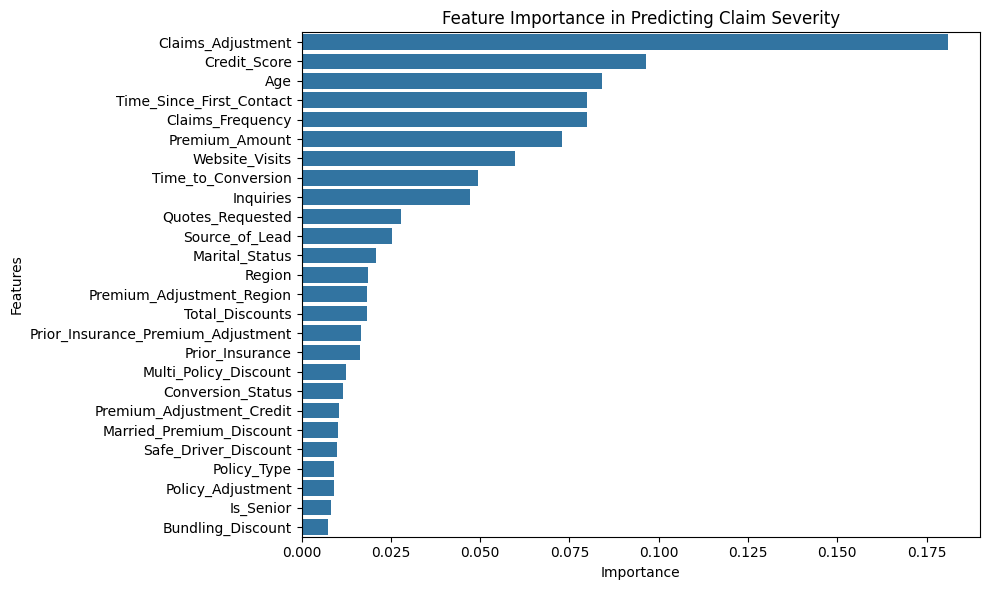

In [17]:
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=importances.index)
plt.title("Feature Importance in Predicting Claim Severity")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()